In [0]:
import pandas as pd
df1 = pd.read_csv('/Volumes/workspace/default/airlines/Flight_delay_cleaned.csv')
display(df1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484310 entries, 0 to 484309
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Unnamed: 0         484310 non-null  int64 
 1   DayOfWeek          484310 non-null  int64 
 2   Date               484310 non-null  object
 3   DepTime            484310 non-null  object
 4   ArrTime            484310 non-null  object
 5   CRSArrTime         484310 non-null  object
 6   UniqueCarrier      484310 non-null  object
 7   Airline            484310 non-null  object
 8   FlightNum          484310 non-null  int64 
 9   TailNum            484310 non-null  object
 10  ActualElapsedTime  484310 non-null  int64 
 11  CRSElapsedTime     484310 non-null  int64 
 12  AirTime            484310 non-null  int64 
 13  ArrDelay           484310 non-null  int64 
 14  DepDelay           484310 non-null  int64 
 15  Origin             484310 non-null  object
 16  Org_Airport        4

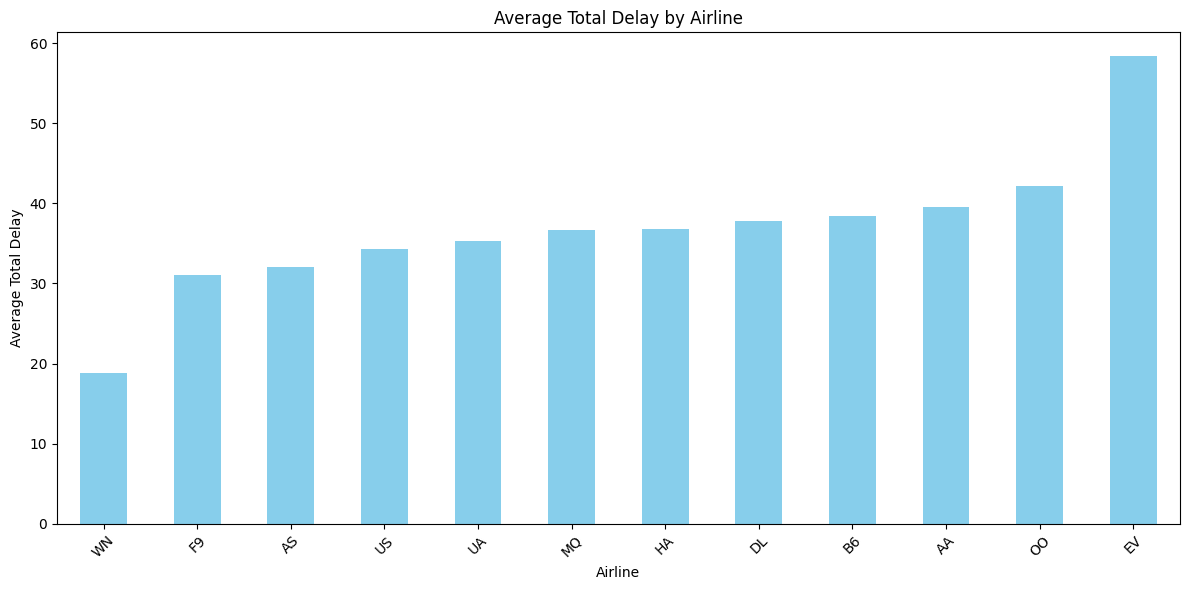

In [0]:
import matplotlib.pyplot as plt

airline_delay = df1.groupby('UniqueCarrier')['TotalDelay'].mean().sort_values()
plt.figure(figsize=(12, 6))
airline_delay.plot(kind='bar', color='skyblue')
plt.title('Average Total Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Total Delay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

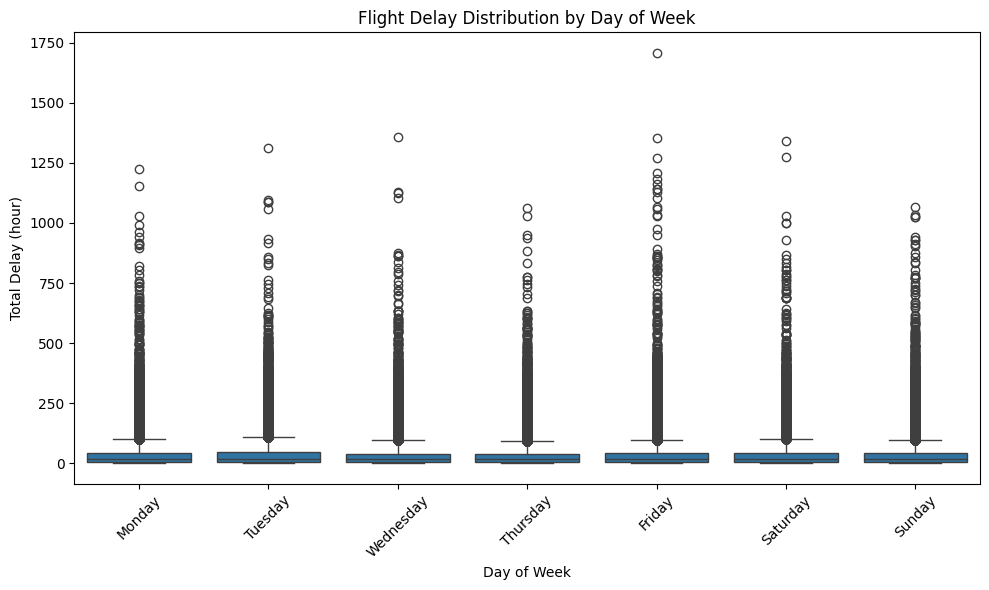

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='DayName', y='TotalDelay', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Flight Delay Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Delay (hour)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

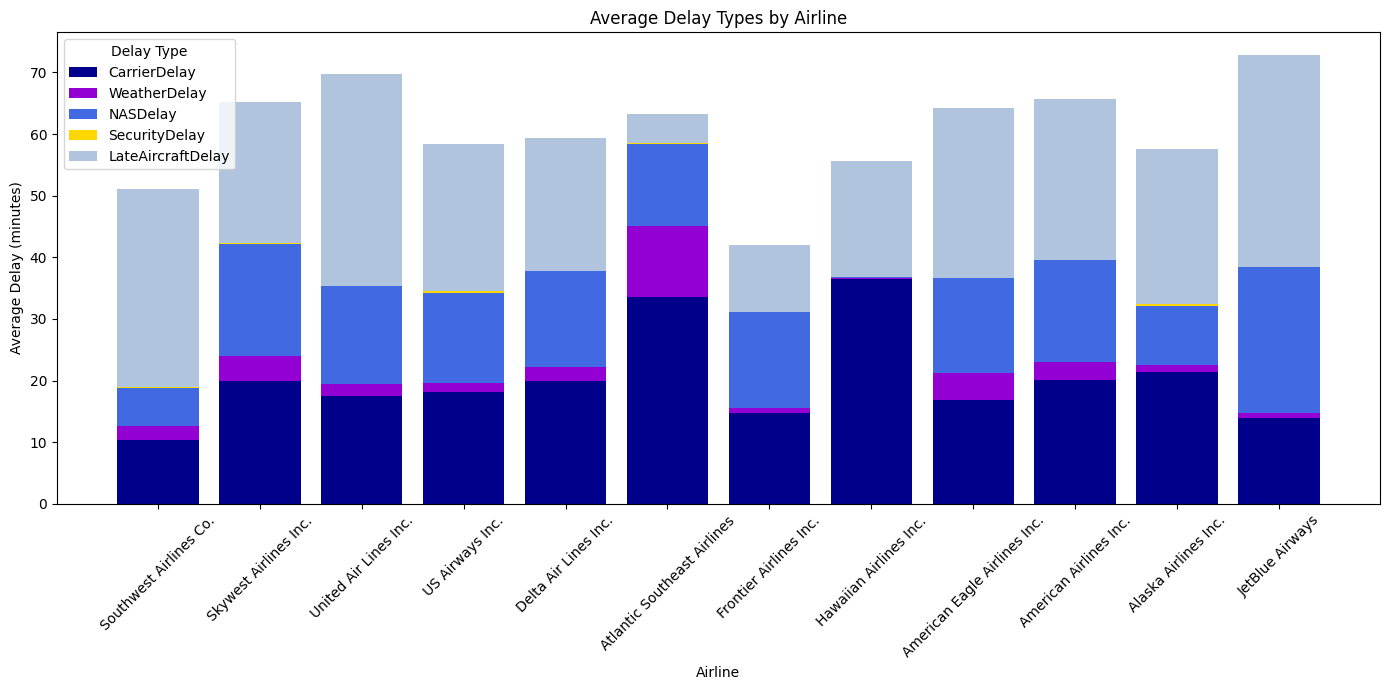

In [0]:
import matplotlib.pyplot as plt

delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
airlines = df1['Airline'].unique()
delay_means = df1.groupby('Airline')[delay_types].mean().reindex(airlines)

colors = ['darkblue', 'darkviolet', 'royalblue', 'gold', 'lightsteelblue']

plt.figure(figsize=(14, 7))
bottom = None
for i, delay in enumerate(delay_types):
    plt.bar(delay_means.index, delay_means[delay], bottom=bottom, color=colors[i], label=delay)
    if bottom is None:
        bottom = delay_means[delay]
    else:
        bottom += delay_means[delay]

plt.title('Average Delay Types by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.legend(title='Delay Type')
plt.tight_layout()
plt.show()

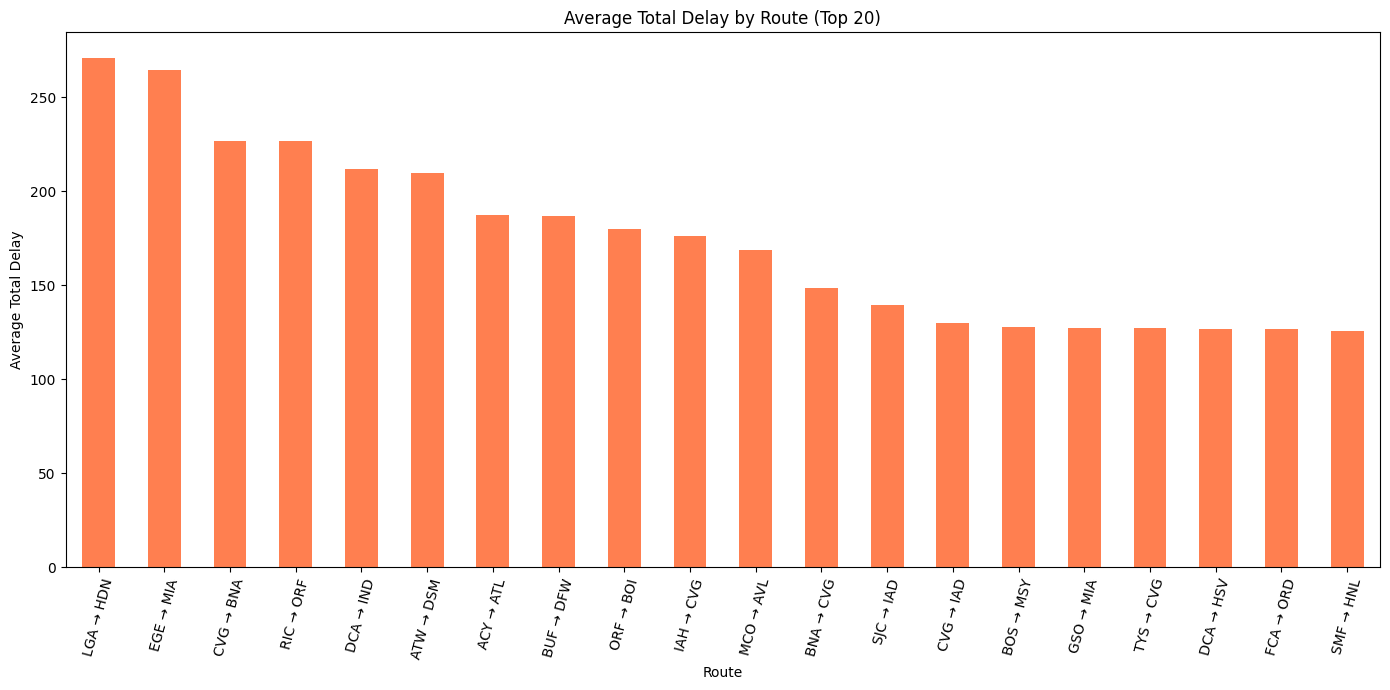

In [0]:
import matplotlib.pyplot as plt

# Create a route column combining origin and destination
df1['Route'] = df1['Origin'] + ' → ' + df1['Dest']

# Calculate average delay per route
route_delay = df1.groupby('Route')['TotalDelay'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 7))
route_delay.plot(kind='bar', color='coral')
plt.title('Average Total Delay by Route (Top 20)')
plt.xlabel('Route')
plt.ylabel('Average Total Delay')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

/home/spark-265f28cd-f46c-45a5-af3a-6d/.ipykernel/2643/command-6478246918434272-670846380:13: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.xlim(0, df1[delay].quantile(0.99))  # focus on main body, show right skew


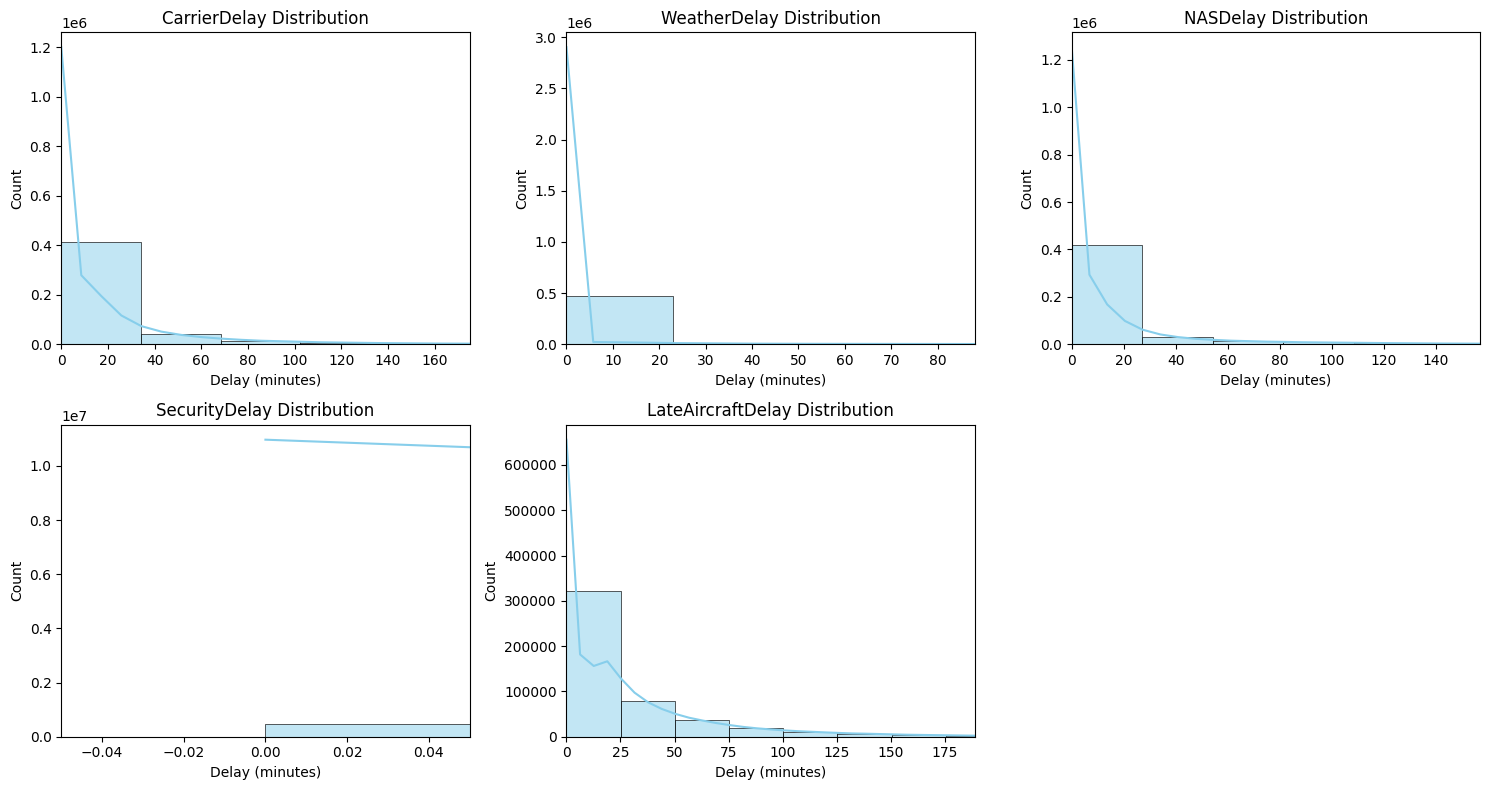

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

plt.figure(figsize=(15, 8))
for i, delay in enumerate(delay_types, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df1[delay], bins=50, kde=True, color='skyblue')
    plt.title(f'{delay} Distribution')
    plt.xlabel('Delay (minutes)')
    plt.ylabel('Count')
    plt.xlim(0, df1[delay].quantile(0.99))  # focus on main body, show right skew

plt.tight_layout()
plt.show()

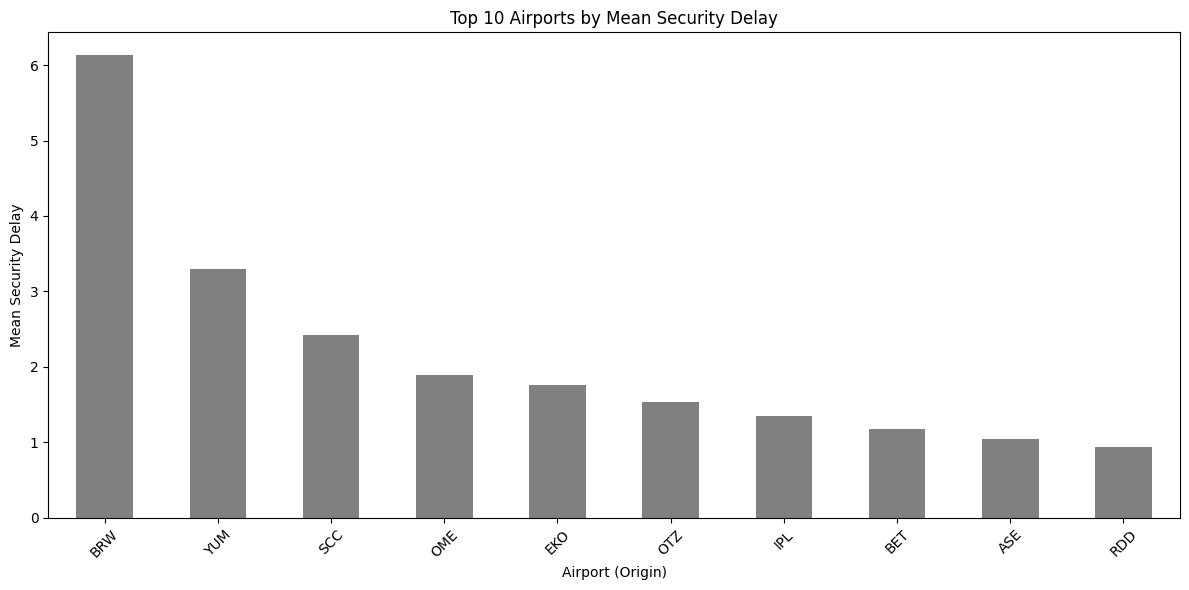

In [0]:
import matplotlib.pyplot as plt

# Calculate mean security delay per airport and get top 10
top10_security_delay = df1.groupby('Origin')['SecurityDelay'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
top10_security_delay.plot(kind='bar', color='grey')
plt.title('Top 10 Airports by Mean Security Delay')
plt.xlabel('Airport (Origin)')
plt.ylabel('Mean Security Delay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

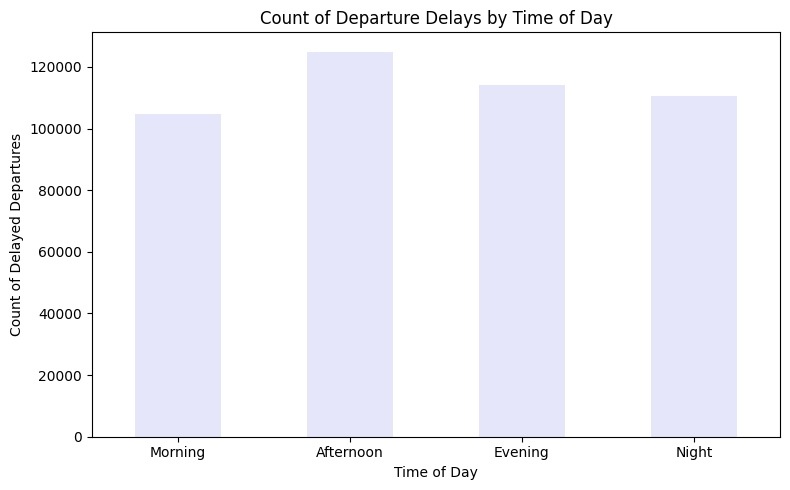

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure depTime is zero-padded and extract hour
df1['DepHour'] = df1['DepTime'].astype(str).str.zfill(4).str[:2].astype(int)

# Categorize depTime into time of day
def time_of_day(hour):
    if 0 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 15:
        return 'Afternoon'
    elif 16 <= hour <= 18:
        return 'Evening'
    elif 19 <= hour <= 21:
        return 'Night'
    else:
        return 'Late Night'

df1['TimeOfDay'] = df1['DepHour'].apply(time_of_day)

# Count of delayed departures by time of day (DepDelay > 0)
delay_counts = df1[df1['DepDelay'] > 0].groupby('TimeOfDay').size().reindex(['Morning', 'Afternoon', 'Evening', 'Night', 'Late Night'], fill_value=0)

# Visualize
plt.figure(figsize=(8, 5))
delay_counts.loc[['Morning', 'Afternoon', 'Evening', 'Night']].plot(kind='bar', color='lavender')
plt.title('Count of Departure Delays by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count of Delayed Departures')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/home/spark-265f28cd-f46c-45a5-af3a-6d/.ipykernel/2643/command-5890475099624784-1642465982:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(airlines))


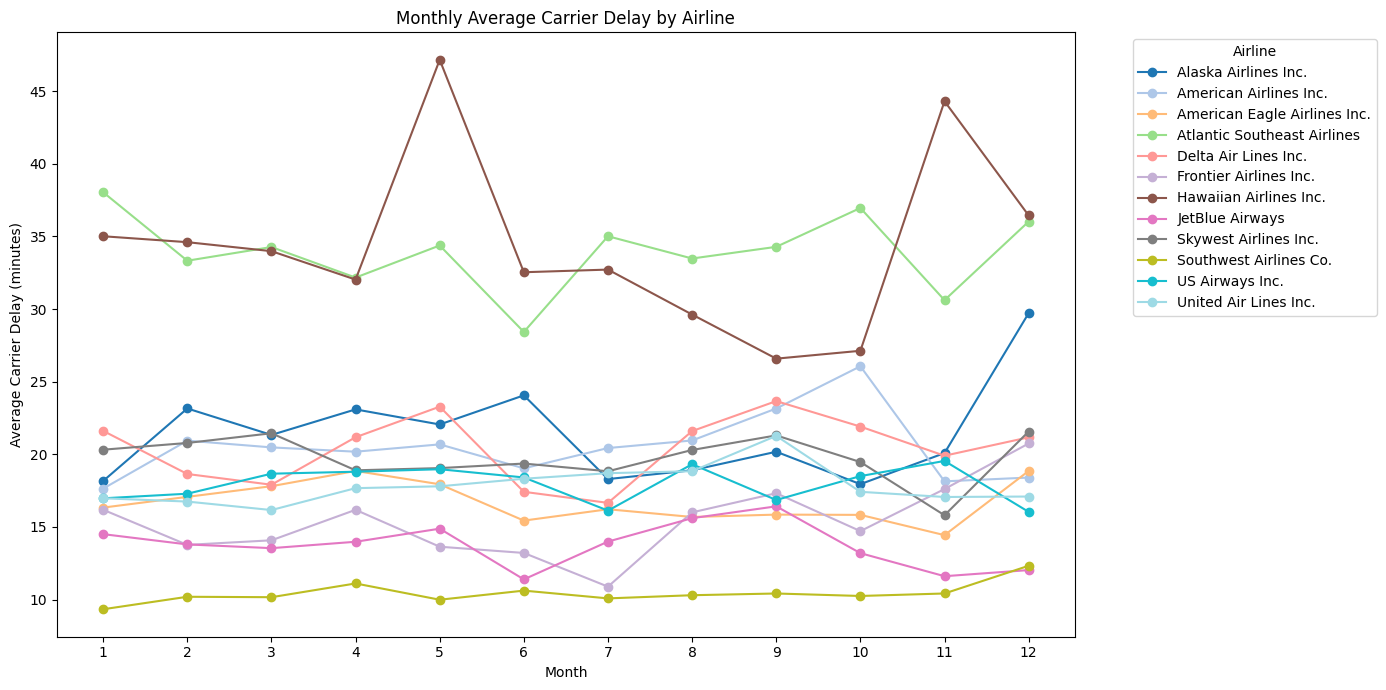

In [0]:
import matplotlib.pyplot as plt

# Ensure 'Month' column exists and is integer
df1['month'] = df1['month'].astype(int)

# Pivot table: rows=Month, columns=UniqueCarrier, values=mean CarrierDelay
carrier_monthly_delay = df1.pivot_table(index='month', columns='Airline', values='CarrierDelay', aggfunc='mean')

# Assign unique color for each airline
airlines = carrier_monthly_delay.columns
colors = plt.cm.get_cmap('tab20', len(airlines))

plt.figure(figsize=(14, 7))
for i, airline in enumerate(airlines):
    plt.plot(carrier_monthly_delay.index, carrier_monthly_delay[airline], label=airline, color=colors(i), marker='o')

plt.title('Monthly Average Carrier Delay by Airline')
plt.xlabel('Month')
plt.ylabel('Average Carrier Delay (minutes)')
plt.legend(title='Airline', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(carrier_monthly_delay.index)
plt.tight_layout()
plt.show()

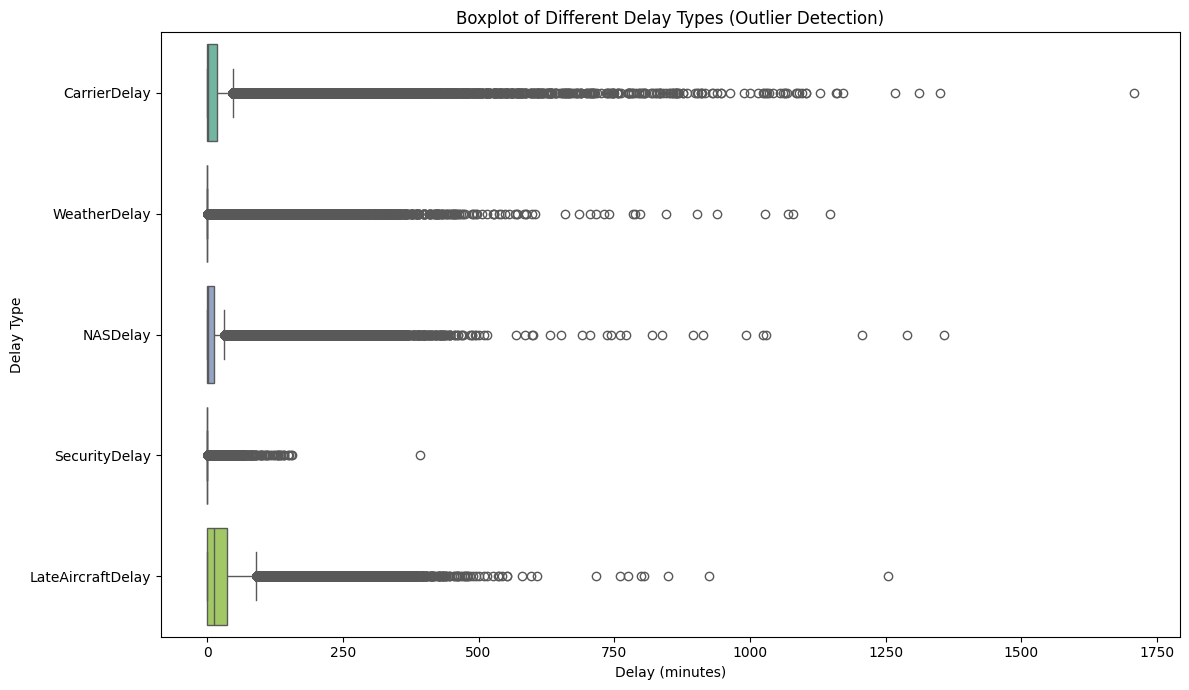

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

plt.figure(figsize=(12, 7))
sns.boxplot(data=df1[delay_types], orient='h', palette='Set2', showfliers=True)
plt.title('Boxplot of Different Delay Types (Outlier Detection)')
plt.xlabel('Delay (minutes)')
plt.ylabel('Delay Type')
plt.tight_layout()
plt.show()

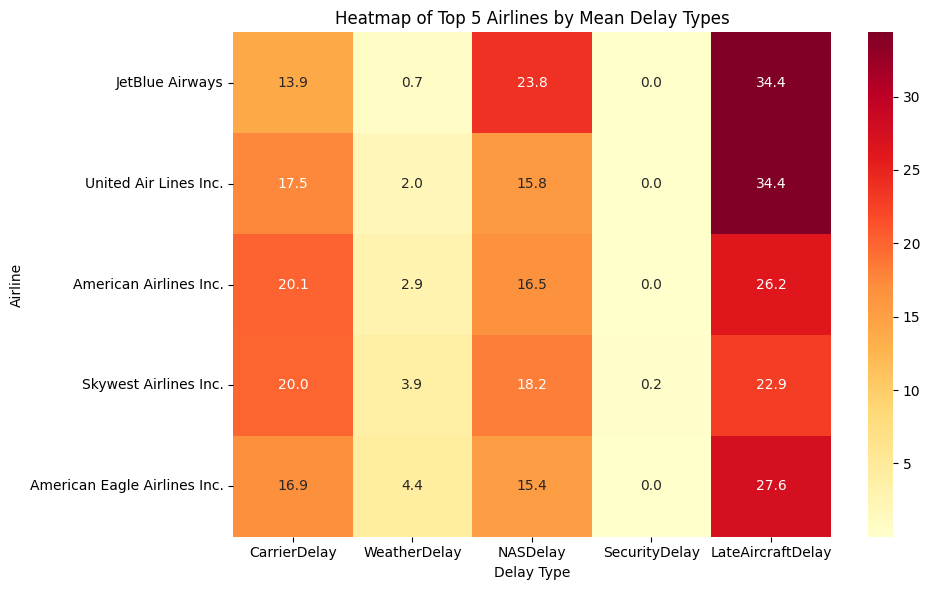

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate mean delay for each airline and delay type
delay_types = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
airline_delay_means = df1.groupby('Airline')[delay_types].mean()

# Select top 5 airlines by total mean delay
airline_delay_means['TotalMeanDelay'] = airline_delay_means.sum(axis=1)
top5_airlines = airline_delay_means['TotalMeanDelay'].nlargest(5).index
top5_delay_data = airline_delay_means.loc[top5_airlines, delay_types]

plt.figure(figsize=(10, 6))
sns.heatmap(top5_delay_data, annot=True, fmt=".1f", cmap="YlOrRd")
plt.title('Heatmap of Top 5 Airlines by Mean Delay Types')
plt.xlabel('Delay Type')
plt.ylabel('Airline')
plt.tight_layout()
plt.show()

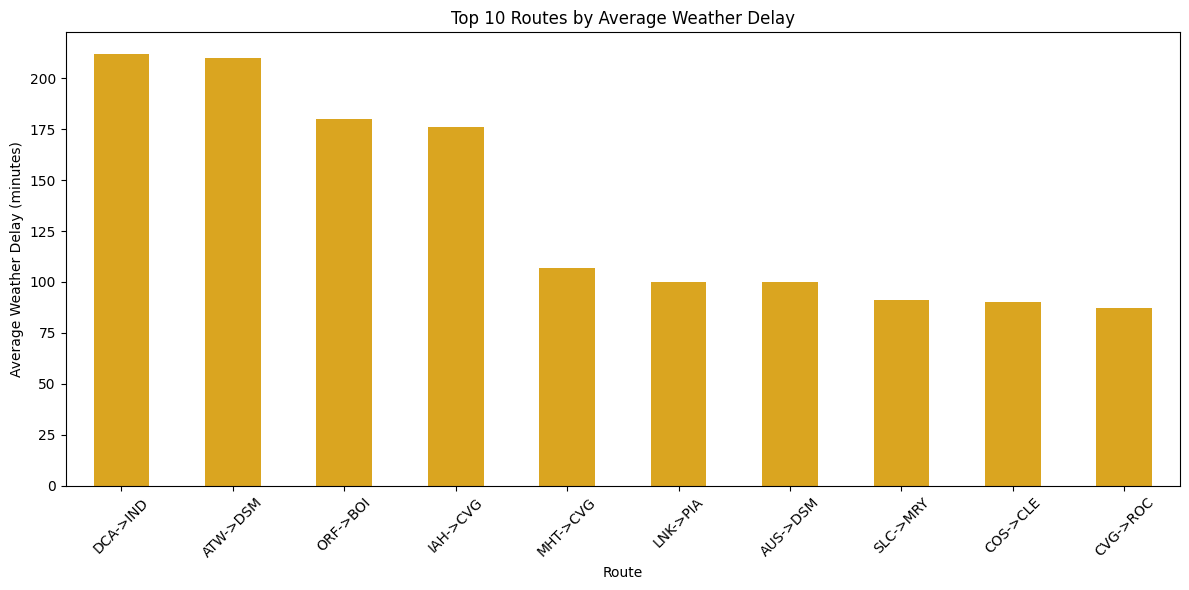

In [0]:
import matplotlib.pyplot as plt

# Create a route column if not already present
if 'Route' not in df1.columns:
    df1['Route'] = df1['Origin'] + ' → ' + df1['Dest']

# Calculate average weather delay per route and get top 10
top10_weather_routes = df1.groupby('Route')['WeatherDelay'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
top10_weather_routes.plot(kind='bar', color='goldenrod')
plt.title('Top 10 Routes by Average Weather Delay')
plt.xlabel('Route')
plt.ylabel('Average Weather Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()